In [1]:
import numpy as np

import matplotlib.pyplot as plt 

np.random.seed(0)
import latexify

In [13]:
@latexify.with_latex
def get_voltage():
    "measure voltage"
    V= np.random.normal(0,4)
    voltage_mean=14.4
    volt_meas=voltage_mean + V
    return volt_meas
get_voltage

In [14]:
@latexify.with_latex
def avarage_filter(k,x_meas,x_avg):
    "calculate avarage voltage using a average filter"
    alpha=(k-1)/k
    x_avg=alpha*x_avg+(1-alpha)*x_meas
    
    return x_avg
avarage_filter


In [10]:
time_end=50.0
dt=0.2

In [11]:
time = np.arange(0,time_end,dt)

n_samples=  len(time)
x_meas_save =np.zeros(n_samples)
x_avg_save =np.zeros(n_samples)

In [12]:
x_avg=0
for i in range(n_samples):
    k=i+1
    x_meas = get_voltage()
    x_avg= avarage_filter(k,x_meas,x_avg)
    
    x_meas_save[i]=x_meas
    x_avg_save[i]=x_avg

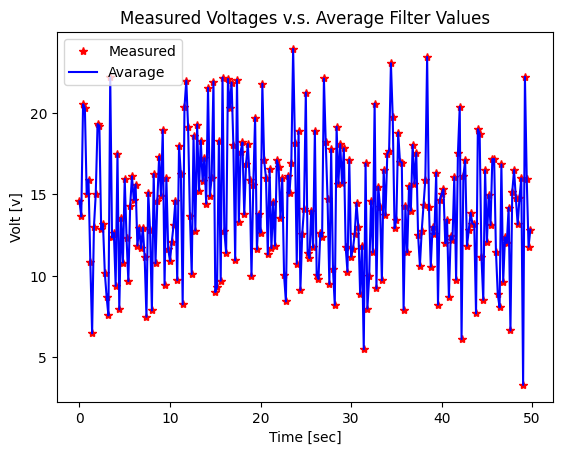

In [17]:
plt.plot(time,x_meas_save,"r*",label="Measured")
plt.plot(time,x_meas_save,"b-",label="Avarage")
plt.legend(loc="upper left")
plt.title("Measured Voltages v.s. Average Filter Values")
plt.xlabel("Time [sec]")
plt.ylabel("Volt [v]")
plt.savefig("png/average_filter.png")

In [25]:
import math
def n_calculate(vB:float,iR:float)->float:
    try:
        return vB/(math.log10(iR/(2.55*(10**-9))+1)*9)*1000
    except ZeroDivisionError:
        return 0

In [31]:
#     first       Second        Third         Fourth           Fivth
vB=[0.0103        ,0.1031       ,0.351       ,0.550          ,0.789]
iR=[0.000000  ,145.95*10**-6  ,1.62*10**-3  ,13.91*10**-3  ,34.797*10**-3]
nList=[]
for x in range(5):
    nList.append(n_calculate(vB=vB[x],iR=iR[x]))
i=0
for n in nList:
    print(i,"   step    ",n,"   calculated.")
    i+=1

0    step     0    calculated.
1    step     2.4078071677325155    calculated.
2    step     6.720690080616498    calculated.
3    step     9.071254716301784    calculated.
4    step     12.28684601787285    calculated.


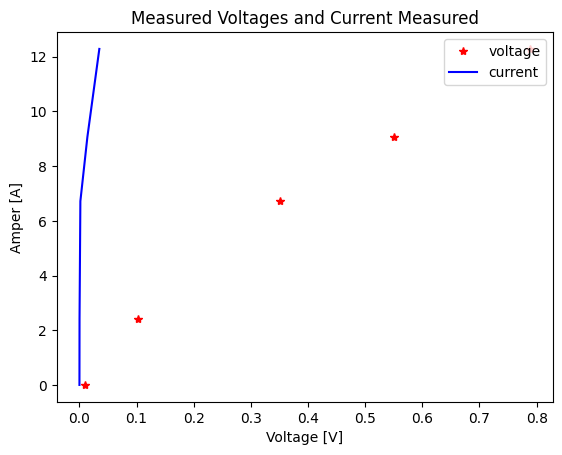

In [33]:
plt.plot(vB,nList,"r*",label="voltage")
plt.plot(iR,nList,"b-",label="current")
plt.legend(loc="upper right")
plt.title("Measured Voltages and Current Measured")
plt.xlabel("Voltage [V]")
plt.ylabel("Amper [A]")
plt.savefig("png/calculate.png")